# Atividade 01 - Parte 01 - Inventario de Emissoes utilizando Python

Desenvolvedores: José Hess e Kezia Bernarda

###  Ler a planilha dos fatores de emissão e estimar a emissão com base na taxa de atividade do empreendimento

Planilhar em arquivo .csv os fatores de emissão para cada processo do seu empreendimento (linhas) e para cada poluente (colunas).
Busca do empreendimento na lista da AP42 e planilha dos fatores de emissão, estimando a emissao com base na taxa de atividade do empreendimento.

Foi utilizado o capítulo 12.13 da AP42, pois a fundição de aço é a mais representativa da empresa WEG.(Link abaixo)

Empresa: WEG\
Produto: Fundição de aço\
Capitulo AP-42: 12.13\
Link: https://www.epa.gov/sites/default/files/2020-11/documents/c12s13.pdf

In [33]:
# Importar bibliotecas
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import locale
from matplotlib.ticker import FuncFormatter

# Coletando o caminho da pasta que estou
cwd = os.getcwd()

# Pasta dos fatores de emissão
path = os.path.join(cwd, 'tabelas')

# Indicando nome do arquivo
chapterNumer = 12
subChapter = 13
file = f'chp_{chapterNumer}_{subChapter}.csv'
print(file)

# Diretório do arquivo completo
full_path = os.path.join(path, file)
print(full_path)

# Abrindo o arquivo utilizando o pandas
fe = pd.read_csv(full_path, encoding='UTF-8')
print(fe)

chp_12_13.csv
C:\Users\Kezia\Documents\GitHub\ENS7173_202401\tabelas\chp_12_13.csv
                 Processo  Particula Filtravel  NOx  PM10
0                   Fusão                  6.5  0.1   NaN
1  Manuseio Areia (areia)                  NaN  NaN  0.27
2    Manuseio Areia (aço)                  NaN  NaN  3.00
3          Fornos (areia)                  NaN  NaN  1.11
4            Fornos (aço)                  NaN  NaN  0.45
5            Derramamento                  NaN  NaN  1.40
6                 Limpeza                  NaN  NaN  0.85
7              Tratamento                  NaN  NaN  0.18
8            Resfriamento                  NaN  NaN  0.70


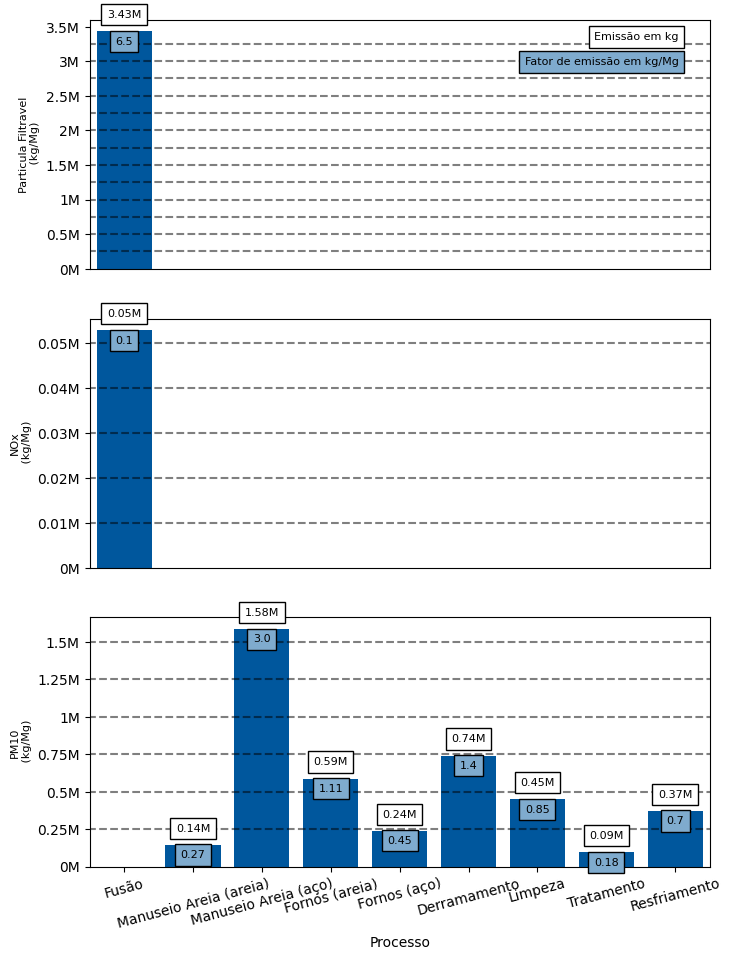

In [47]:
#Plotando os fatores de emissao

# Função para formatar os rótulos em milhões
def mil(x, pos):
        if x % 1e6 == 0:
            return '%1.0fM' % (x * 1e-6)
        elif x % 1e5 == 0:
            return '%1.1fM' % (x * 1e-6)
        else:
            return '%1.2fM'% (x * 1e-6)
            
# A WEG produziu cerca de 20 milhões de motores em 2023, sendo que 40% das emissões se encontram na cidade de Jaraguá do Sul
# Nesse sentido, de acordo com catálogo de motores na internet, foi atribuído 0.1 toneladas de peso médio de motor, que é aproximadamente o valor mediano encontrado dos motores https://pt.slideshare.net/PAULISTA169/catalogo-de-motores-weg
# Além disso, de acordo com inventário de emissões da empresa, o aço é responsável por 65,96 % das emissões que acontecem na fábrica https://static.weg.net/medias/downloadcenter/h5d/hb6/WEG_Inventario_GEE_2022.pdf
# Por isso, foi adotado que dos 20 milhões de motores produzidos, 40% são em Jaraguá, eles pesam 0.1 toneladas, e são compostos por 65.96% de aço
# Ressalta-se que isso são aproximações para efetuar os cálculos, seria necessária saber qual a composição verdadeira dos motores, qual a venda de cada tipo de motor, informações essas não disponíveis na internet
atv = 20000000*0.4*0.1*0.6596
# print(atv)

## Criando a figura com Matplotlib
# Subplots com número de linhas igual ao número de poluentes
# Sharex significa compartilhar eixo x
fig,ax = plt.subplots(len(fe.columns)-1,1,sharex=True,figsize=(8,11))

#Loop para preencher o subplot com os gráficos de barra
for ii in range(1,len(fe.columns)):
    barras = ax[ii-1].bar(fe['Processo'], atv * fe.iloc[:, ii], color='#00579D')

    # Anotando o valor de cada barra e o fator de emissão de cada barra
    for barra in barras:
        altura = barra.get_height()
        if np.isfinite(altura):  # Verificando se a altura não é nan
            i = round((barra.get_x())-0.6)+1
            # Adicionando os valores totais de emissão e de fator de emissão
            ax[ii-1].text(barra.get_x() + barra.get_width() / 2, altura + 0.05 * atv*fe.iloc[:,ii].max(), milhao(altura, None),
                          ha='center', va='bottom', fontsize=8,
                          bbox=dict(facecolor='white', alpha=1, edgecolor='black'))
            ax[ii-1].text(barra.get_x() + barra.get_width() / 2, altura - 0.02 * atv*fe.iloc[:,ii].max(), fe.iloc[i, ii],
                          ha='center', va='top', fontsize=8,
                          bbox=dict(facecolor='#7FABCE', alpha=1, edgecolor='black'))

    # Explicação dos textos
    if ii == 1:
        ax[ii-1].text(0.95, 0.95, 'Emissão em kg', transform=ax[ii-1].transAxes, fontsize=8,
                      verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=1))
        ax[ii-1].text(0.95, 0.85, 'Fator de emissão em kg/Mg', transform=ax[ii-1].transAxes, fontsize=8,
                      verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='#7FABCE', alpha=1))

    # If Else para deixar o eixo x apenas no último gráfico
    if ax[2] == ax[ii-1]:
        ax[ii-1].set_xlabel('Processo')
        ax[ii-1].set_xticks(range(len(fe['Processo'])))
        ax[ii-1].set_xticklabels(fe['Processo'], rotation=15)
    else: 
        ax[ii-1].xaxis.set_visible(False)
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n (kg/Mg)',fontsize=8)

    # Configura o formatter para milhões
    formatter = FuncFormatter(mil)
    ax[ii-1].yaxis.set_major_formatter(formatter)

    # Limitando o tamanho do eixo x
    ax[ii-1].set_xlim(-0.5,8.5)

    # Estabelecendo linhas pontilhadas no gráfico
    for i in range(1,int(atv*fe.iloc[:,ii].max())+1):
        if i%10000 == 0:
            if int(atv*fe.iloc[:,ii].max()) < 1000000:
                ax[ii-1].hlines(y=i,xmin=-1,xmax=9, alpha=0.5,linestyle='dashed', colors = 'black')
            else: 
                if i%250000 == 0:
                    ax[ii-1].hlines(y=i,xmin=-1,xmax=9, alpha=0.5,linestyle='dashed', colors = 'black')

# Salva a figura na pasta figures - criar a pasta antes
fig.savefig(cwd+'\\figures\\barplot_fatorEmiss.png')

#### Qual é o processo do empreendimento que possui maior emissão?

Ao avaliar as figuras, percebe-se que para os poluentes partícula filtrável e NOx, o processo de fusão é o que possui maior emissão, sendo 6.5 o fator de emissão para partícula filtrável e 0.1 para o NOx, emitindo no ano 3.43 milhões de kgs e 0.05 milhões de kgs para partícula filtrável e NOx, respectivamente. Já o processo que tem maior emissão de PM10 é o manuseio de areia, de acordo com as toneladas de areias utilizada no processo, sendo que foi entendido que para cada tonelada de aço é utilizado uma tonelada de areia¹, em que o fator de emissão é 3 e a emissão é de 1.58 milhões de kgs de PM10 no ano, entretanto, se for avaliar o processo inteiro, considerando a emissão em relação ao aço também, o fator de emissão sobe para 4.11, sendo 2.17 milhões de kgs de PM10 emitidos no ano.

¹: https://repositorio.ufmg.br/bitstream/1843/BUOS-9ATFXE/1/monografia_areia_de_fundi__o.pdf (2º parágrafo da introdução)

In [48]:
# Criando vetor de datas 
import pandas as pd 

# Criar um intervalo de datas
datas = pd.date_range(start='2023-01-01', end='2023-12-31 23:00:00', freq='h')

# Criar um DataFrame com as datas 
df = pd.DataFrame({'Data': datas})

#Extrair os meses das datas e adicioná-los como uma coluna no DataFrame
df['Mes'] = df['Data'].dt.month

#Criando valor da semana
sem = np.full(len(df),1)
for i in range(167,8760,168):
    sem[i:] += 1
df['Semana'] = sem

#Mostrar o DataFrame resultante
print(df)


                    Data  Mes  Semana
0    2023-01-01 00:00:00    1       1
1    2023-01-01 01:00:00    1       1
2    2023-01-01 02:00:00    1       1
3    2023-01-01 03:00:00    1       1
4    2023-01-01 04:00:00    1       1
...                  ...  ...     ...
8755 2023-12-31 19:00:00   12      53
8756 2023-12-31 20:00:00   12      53
8757 2023-12-31 21:00:00   12      53
8758 2023-12-31 22:00:00   12      53
8759 2023-12-31 23:00:00   12      53

[8760 rows x 3 columns]


### Elaborar uma função para criar uma variabilidade na taxa de atividade do empreendimento, com componentes aleatória e sazonal (com base nas dadas do ano de 2023)

In [50]:
# Criando sazonalidade de acordo com as ações

df_acoes = pd.read_csv(r'C:\Users\Kezia\Documents\GitHub\ENS7173_202401\tabelas\acoes_WEG.csv', encoding='utf-8')

# Filtrando a última e primeira coluna
df_acoes = df_acoes.iloc[:, [0, 3]]

# Criando um dataframe com todas as datas
datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
df_datas = pd.DataFrame(datas, columns=['Data'])

# Converter a coluna de datas do df_acoes para datetime
df_acoes['Data'] = pd.to_datetime(df_acoes['Data'], format='%m/%d/%Y')

# Combinando os DataFrames
df_acoes = df_datas.merge(df_acoes, on='Data', how='left')

# Interpolando linearmente os valores NaN e definindo 0 para primeiro de janeiro
df_acoes['Porcentagem'] = df_acoes['Porcentagem'].interpolate(method='linear')
df_acoes['Porcentagem'] = df_acoes['Porcentagem'].fillna(0)

print(df_acoes)

# Definindo a taxa de atividade média horária para chegar em 8 milhoes de toneladas de aço no ano.

# Somando as porcentagens para definir em que ponto a produção ficou na média.
prctMed = ((df_acoes['Porcentagem'] + 100).mean())/100

# Definindo a atividade média horária
atvMedH = atv/(365*24*prctMed)

          Data  Porcentagem
0   2023-01-01         0.00
1   2023-01-02        -1.04
2   2023-01-03        -3.51
3   2023-01-04        -2.86
4   2023-01-05        -2.65
..         ...          ...
360 2023-12-27        -4.31
361 2023-12-28        -4.13
362 2023-12-29        -4.13
363 2023-12-30        -4.13
364 2023-12-31        -4.13

[365 rows x 2 columns]


                    Data  Mes  Semana  atividade  sazonalidade
0    2023-01-01 00:00:00    1       1  64.587031        1.0000
1    2023-01-01 01:00:00    1       1  61.940676        1.0000
2    2023-01-01 02:00:00    1       1  64.974257        1.0000
3    2023-01-01 03:00:00    1       1  64.041695        1.0000
4    2023-01-01 04:00:00    1       1  62.890384        1.0000
...                  ...  ...     ...        ...           ...
8755 2023-12-31 19:00:00   12      53  60.410261        0.9587
8756 2023-12-31 20:00:00   12      53  62.800064        0.9587
8757 2023-12-31 21:00:00   12      53  65.124540        0.9587
8758 2023-12-31 22:00:00   12      53  59.844437        0.9587
8759 2023-12-31 23:00:00   12      53  64.977583        0.9587

[8760 rows x 5 columns]


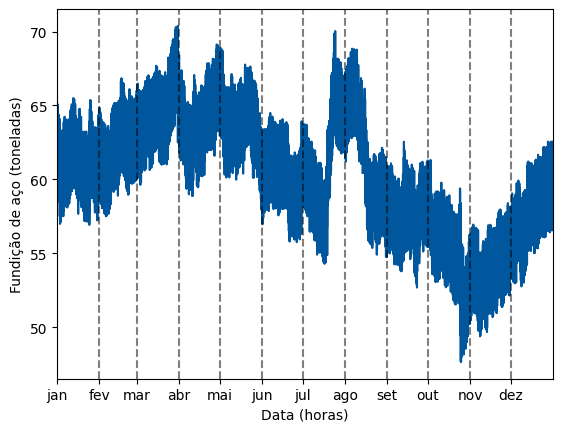

In [51]:
# Ajustar meus números aleatórios com base no comprimento do vetor de datas

# Extraindo o número de linhas/número de datas
n = df.shape[0]

# Definindo a atividade máxima e mínima horária
atvMaxH = 1.05*atvMedH
atvMinH = 0.95*atvMedH

# Criando atividade aleatória
atvArray = (atvMaxH - atvMinH)*np.random.rand(n) + atvMinH
df['atividade'] = atvArray

# Criando componente sazonal
#sazonalidade = atvMinH*np.cos((2*np.pi)*(df['Semana']-1)/26)/2
#df['sazonalidade'] = sazonalidade
#print(df)

# Criando componente sazonal
sazonalidade = df_acoes['Porcentagem']/100 + 1
sazonalidade = np.repeat(sazonalidade.values, 24)
df['sazonalidade'] = sazonalidade
print(df)

# Criando atividade real
atvHor = atvArray + atvMedH*(sazonalidade-1)
df['Atividade Horária'] = atvHor

# Configurando o locale para português
locale.setlocale(locale.LC_TIME, 'pt_BR.utf8')

# Criando uma figura com os valores aleatórios
fig, ax= plt.subplots()

ax.plot(df['Data'],df['Atividade Horária'], color = '#00579D', alpha = 1, label = 'Produção horária')
ax.set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-12-31 23:00:00'))

# Adicionando linha para cada mês
for date in pd.date_range(start='2023-01-01', end='2023-12-31', freq='MS'):
    ax.axvline(x=date, color='black', linestyle='--', alpha=0.5)

# Configurando o formato do eixo x para mostrar os meses abreviados
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Coloca um marcador em cada mês
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Mostra os três primeiros caracteres do mês

# Definindo o label de cada eixo
ax.set_ylabel('Fundição de aço (toneladas)')
ax.set_xlabel('Data (horas)')

df.to_csv(r"C:\Users\Kezia\Documents\GitHub\ENS7173_202401\tabelas\ativWEG.csv")

#### Qual a variabilidade temporal da taxa de atividade?

As taxas foram estimadas para cada hora do ano de 2023, sendo que a componente aleatória foi definida entre 90 e 110% do valor da taxa de atividade média de utilização de tonelada de aço. Já a componente sazonal foi baseada na variação das ações da empresa, sendo o primeiro dia tratado com 0% de producao e todos os outros dias foram comparados em relação a primeiro de janeiro. Nesse sentido, observa-se graficamente que a variação aleatória está em uma escala de aproximadamente 7 toneladas por hora. Além disso, de janeiro até final de março a produção subiu até chegar ao topo, teve uma queda repentina no começo de abril e assim se manteve até metade de julho, quando teve uma alta na produção até metade de agosto, posteriormente decaiu novamente até final de outubro, tendo uma alta no mês de novembro e dezembro. Percebe-se que se não houvesse o aumento e redução repentinos de produção no mês de julho e agosto, respecticamente, a produção seguiria aproximadamente uma função seno, com alta em final de março e baixa em final de outubro.

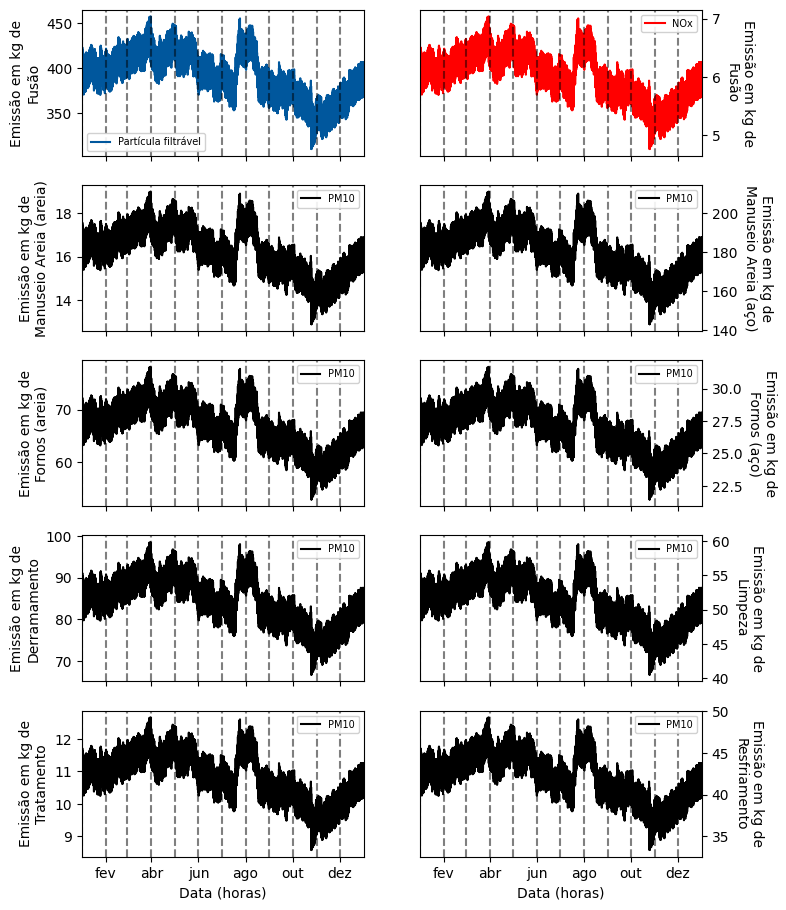

In [52]:
# Criando a figura de emissão de cada processo

# Subplots com número de linhas e colunas o suficiente para todos os processos
# Sharex significa compartilhar eixo x e sharey significa compartilhar o eixo y
fig,ax = plt.subplots(5,2,sharex=True, figsize=(8,11))
colors = ['#00579D','red','black'] # Definindo as cores de linha para cada poluente
labels = ['Partícula filtrável', 'NOx', 'PM10'] # Apresentando os nomes de cada poluente

i = 0 # Definindo linha 0
j = 0 # Definindo coluna 0

#Loop para preencher o subplot com os gráficos
for k in range(1,4):
    for a in range(9):
        FE = fe.iloc[a, k]
        if not np.isnan(FE):
            ax[i,j].plot(df['Data'],df['Atividade Horária']*FE, color = colors[k-1], alpha=1, label=labels[k-1])
            ax[i,j].set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-12-31 23:00:00'))
        
            # Adicionando linha para cada mês
            for date in pd.date_range(start='2023-01-01', end='2023-12-31', freq='MS'):
                ax[i,j].axvline(x=date, color='black', linestyle='--', alpha=0.5)
        
            # Configurando o formato do eixo x para mostrar os meses abreviados
            ax[i,j].xaxis.set_major_locator(mdates.MonthLocator(bymonth=(2, 4, 6, 8, 10, 12)))  # Coloca um marcador em cada mês
            ax[i,j].xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Mostra os três primeiros caracteres do mês
        
            # Criando legenda de acordo com o processo
            leg = ax[i,j].legend(fontsize=7, framealpha=0.9)
        
            # Definindo a posição do label de Data na última linha
            if i == 4:
                ax[i,j].set_xlabel('Data (horas)')

            # Definindo a rotação do label se estiver na coluna da direita para 180 e não definindo se estiver na coluna da esquerda
            # Para evitar texto sobre os gráficos do lado esquerdo, botar eixo y no lado direito dos gráficos da segunda coluna
            if j == 1:
                ax[i,j].set_ylabel('Emissão em kg de\n' + fe['Processo'][a], rotation = 270, labelpad = 25)
                ax[i,j].yaxis.tick_right()
                ax[i,j].yaxis.set_label_position("right")
            else:
                ax[i,j].set_ylabel('Emissão em kg de\n' + fe['Processo'][a])

            # If else para selecionar qual linha e coluna vai ser o próximo gráfico
            if j % 2 == 0:
                j = 1
            else:
                i = i + 1
                j = 0

    # Salva a figura na pasta figures
    fig.savefig(cwd+'\\figures\\emissaoProcessos.png')

6.5
0.1
7.960000000000001


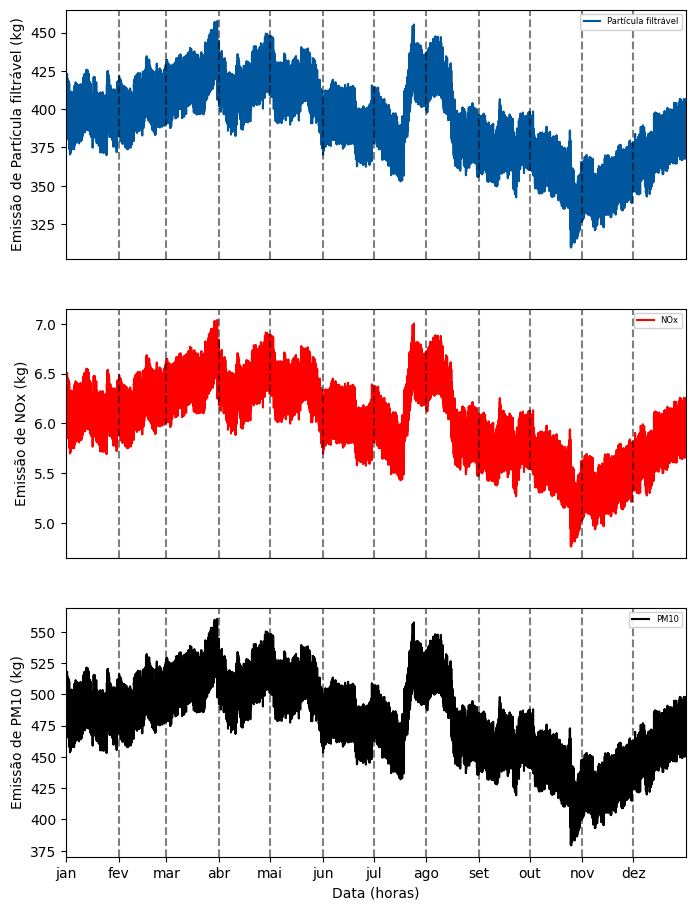

In [53]:
# Criando a figura de emissão para cada poluente

# Subplots com número de linhas e colunas o suficiente para todos os poluente
# Sharex significa compartilhar eixo x
fig,ax = plt.subplots(len(fe.columns)-1,1,sharex=True, figsize=(8,11))

#Loop para preencher o subplot com os gráficos
for ii in range(1,len(fe.columns)):
    # Soma dos fatores de emissão de cada poluente
    SomaFE = (fe.iloc[:,ii]).sum()
    print(SomaFE)

    # Plotando os valores no gráfico
    ax[ii-1].plot(df['Data'],df['Atividade Horária']*SomaFE, color = colors[ii-1], alpha=1, label=labels[ii-1])
    ax[ii-1].set_xlim(pd.Timestamp('2023-01-01'), pd.Timestamp('2023-12-31 23:00:00'))

    # Adicionando linha para cada mês
    for date in pd.date_range(start='2023-01-01', end='2023-12-31', freq='MS'):
        ax[ii-1].axvline(x=date, color='black', linestyle='--', alpha=0.5)

    # Configurando o formato do eixo x para mostrar os meses abreviados
    ax[ii-1].xaxis.set_major_locator(mdates.MonthLocator())  # Coloca um marcador em cada mês
    ax[ii-1].xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Mostra os três primeiros caracteres do mês

    # Definindo o label de cada eixo
    if ax[2] == ax[ii-1]:
        ax[ii-1].set_xlabel('Data (horas)')
    else: 
        ax[ii-1].xaxis.set_visible(False)
    ax[ii-1].set_ylabel('Emissão de ' + labels[ii-1] + ' (kg)')
    
    # Criando legenda de acordo com o processo
    leg = ax[ii-1].legend(loc='best', fontsize=6, title_fontsize=7, framealpha=0.9)
     
# Salva a figura na pasta figures
fig.savefig(cwd+'\\figures\\emissaoPoluentes.png')

#### Qual a soma das emissões considerando todos os processos?

In [54]:
# Qual a emissão média, mínima e máxima (unidades sempre em gramas por segundo - g/s)

df['Atividade em kg/s'] = df['Atividade Horária']*1000/3600

# Cálcula emissões para cada poluente
for ii in range(1,len(fe.columns)):
    # Somando os fatores de emissão de cada processo para um poluente
    SomaFE = (fe.iloc[:,ii]).sum()

    # Encontrando o menor, maior e médio valor de emissão, fazendo conversão de kg/h para g/s com a multiplicação de 1000/3600, e apresentando apenas 2 algarismos após o ponto
    emissSoma = round(df['Atividade Horária'].sum() * SomaFE, 2)
    emissMenor = round(df['Atividade em kg/s'].min() * SomaFE, 2)
    emissMaior = round(df['Atividade em kg/s'].max() * SomaFE, 2)
    emissMedia = round(df['Atividade em kg/s'].mean() * SomaFE, 2)

    # Apresentando a quantidade de valores de emissão para cada poluente
    print('A soma das emissões de ' + labels[ii-1] + ' foi de ' + str(emissSoma) + ' kg')
    print('A emissão mínima de ' + labels[ii-1] + ' foi de ' + str(emissMenor) + ' g/s')
    print('A emissão média de ' + labels[ii-1] + ' foi de ' + str(emissMedia) + ' g/s')
    print('A emissão máxima de ' + labels[ii-1] + ' foi de ' + str(emissMaior) + ' g/s')
    print('')
    
    df['Emissão de ' +  labels[ii-1] + ' em g/s'] = df['Atividade em kg/s']*SomaFE

print(df)
df.to_csv(r"C:\Users\Kezia\Documents\GitHub\ENS7173_202401\tabelas\ativWEG.csv")

A soma das emissões de Partícula filtrável foi de 3429948.59 kg
A emissão mínima de Partícula filtrável foi de 86.04 g/s
A emissão média de Partícula filtrável foi de 108.76 g/s
A emissão máxima de Partícula filtrável foi de 127.08 g/s

A soma das emissões de NOx foi de 52768.44 kg
A emissão mínima de NOx foi de 1.32 g/s
A emissão média de NOx foi de 1.67 g/s
A emissão máxima de NOx foi de 1.96 g/s

A soma das emissões de PM10 foi de 4200367.82 kg
A emissão mínima de PM10 foi de 105.36 g/s
A emissão média de PM10 foi de 133.19 g/s
A emissão máxima de PM10 foi de 155.62 g/s

                    Data  Mes  Semana  atividade  sazonalidade  \
0    2023-01-01 00:00:00    1       1  64.587031        1.0000   
1    2023-01-01 01:00:00    1       1  61.940676        1.0000   
2    2023-01-01 02:00:00    1       1  64.974257        1.0000   
3    2023-01-01 03:00:00    1       1  64.041695        1.0000   
4    2023-01-01 04:00:00    1       1  62.890384        1.0000   
...                  ..